## special functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import gamma as Gamma

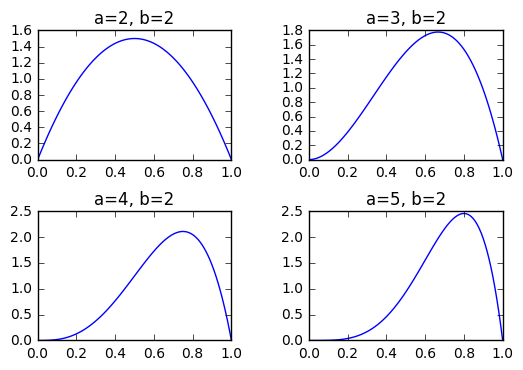

In [11]:
def normal(x, m, s):
    p = 1./np.sqrt(2*np.pi*s**2)*np.exp(-(x-m)**2/(2.*s**2))
    return p

def beta(a, b, x):
    return Gamma(a+b)/(Gamma(a)*Gamma(b))*x**(a-1)*(1-x)**(b-1)

x = np.linspace(0.0, 1., 100)
plt.figure()
plt.subplot(221)
plt.plot(x, beta(2, 2, x), label='a=2, b=2')
plt.title('a=2, b=2')

plt.subplot(222)
plt.plot(x, beta(3, 2, x), label='a=3, b=2')
plt.title('a=3, b=2')

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.subplot(223)
plt.plot(x, beta(4, 2, x), label='a=4, b=2')
plt.title('a=4, b=2')

plt.subplot(224)
plt.plot(x, beta(5, 2, x), label='a=5, b=2')
plt.title('a=5, b=2')

plt.savefig('./beta.png')
plt.show()

In [26]:
n_samples = 10000


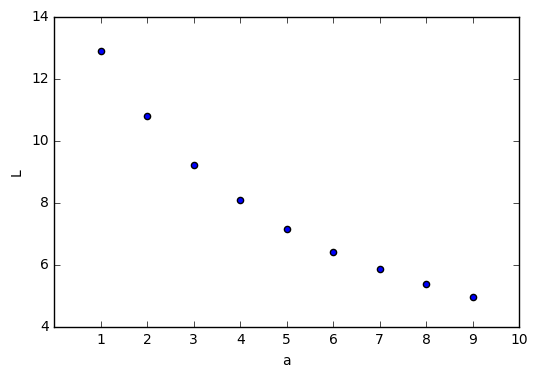

In [56]:
import theano
from keras.objectives import categorical_crossentropy
from keras import backend as K

def get_cost_fn():
    output = K.placeholder(shape=(None, 2))
    target = K.placeholder(shape=(None, 2))

    cost = categorical_crossentropy(output, target)
    cost_fn = theano.function([output, target], cost)
    return cost_fn

def gen_data(N, a, b):
  """
  N: 数据集中的样本数量
  a, b: beta 分布中的参数
  """
  #　样本的真实标签数据
  y = np.zeros(shape=(N, 2))
  y[:, 0] = 1.
  y = np.asarray(y, dtype=theano.config.floatX)

  #　模型预测出的概率值
  f_0 = np.random.beta(a, b, size=(N, 1))
  f_1 = 1. - f_0
  f = np.hstack([f_0, f_1])
  f = np.asarray(f, dtype=theano.config.floatX)
  
  return f, y

def main():
    cost_fn = get_cost_fn()
    b = 4
    cost_list = []
    for a in range(1, 10):
        y_pred, y_true = gen_data(10000, a, b)
        cost = np.mean(cost_fn(y_pred, y_true))
        cost_list.append(cost)
    return cost_list

cost_list = main()
plt.scatter(range(1, len(cost_list)+1), cost_list)
plt.xticks(range(1, 11))
plt.xlabel('a')
plt.ylabel('L')
plt.savefig('./crossentropy.png')
plt.show()

In [43]:


f, y = gen_data(100, 2, 3)
print f.shape

(100, 2)


In [ ]:
import numpy as np